# Real Estate Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('data/RealEstate_California.csv', index_col=0) #loading the data
df.head() #viewing the first five rows of data

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [23]:
df.info() #looking at the overall columns/features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35389 entries, 0 to 35388
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35389 non-null  object 
 1   stateId             35389 non-null  int64  
 2   countyId            35389 non-null  int64  
 3   cityId              35389 non-null  int64  
 4   country             35389 non-null  object 
 5   datePostedString    35386 non-null  object 
 6   is_bankOwned        35389 non-null  int64  
 7   is_forAuction       35389 non-null  int64  
 8   event               35389 non-null  object 
 9   time                35100 non-null  float64
 10  price               35389 non-null  float64
 11  pricePerSquareFoot  35389 non-null  float64
 12  city                35389 non-null  object 
 13  state               35389 non-null  object 
 14  yearBuilt           35389 non-null  int64  
 15  streetAddress       35389 non-null  object 
 16  zipc

In [24]:
df.isna().sum() #checking for null values

id                      0
stateId                 0
countyId                0
cityId                  0
country                 0
datePostedString        3
is_bankOwned            0
is_forAuction           0
event                   0
time                  289
price                   0
pricePerSquareFoot      0
city                    0
state                   0
yearBuilt               0
streetAddress           0
zipcode                25
longitude               0
latitude                0
hasBadGeocode           0
description           279
currency                0
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county                  0
dtype: int64

In [25]:
df.dropna(inplace=True) #dropping null values since there aren't too many when looking at the overall dataset

In [26]:
df.isna().sum() #verifying there's no more nulls

id                    0
stateId               0
countyId              0
cityId                0
country               0
datePostedString      0
is_bankOwned          0
is_forAuction         0
event                 0
time                  0
price                 0
pricePerSquareFoot    0
city                  0
state                 0
yearBuilt             0
streetAddress         0
zipcode               0
longitude             0
latitude              0
hasBadGeocode         0
description           0
currency              0
livingArea            0
livingAreaValue       0
lotAreaUnits          0
bathrooms             0
bedrooms              0
buildingArea          0
parking               0
garageSpaces          0
hasGarage             0
levels                0
pool                  0
spa                   0
isNewConstruction     0
hasPetsAllowed        0
homeType              0
county                0
dtype: int64

In [27]:
print(f'There are {df.duplicated().sum()} duplicated values') #checking for any duplicated values

There are 0 duplicated values


(array([3.4464e+04, 2.3300e+02, 6.3000e+01, 2.6000e+01, 1.1000e+01,
        5.0000e+00, 5.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([       0.,  9500000., 19000000., 28500000., 38000000., 47500000.,
        57000000., 66500000., 76000000., 85500000., 95000000.]),
 <BarContainer object of 10 artists>)

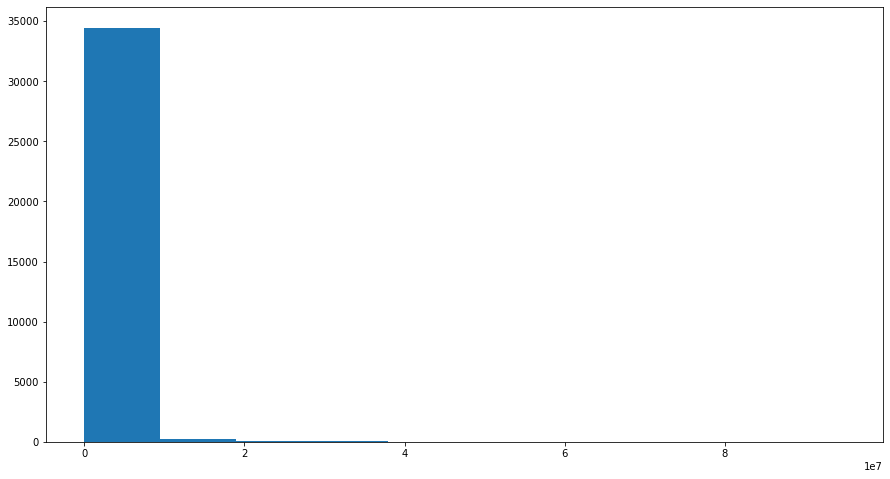

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['price'])
